<a href="https://colab.research.google.com/github/Jia-Wei-Liao/3D-Animation-Morphing/blob/main/HW1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
class DataPreprocessing():
    def __init__(self, df):
        self.df = df.copy()
    
    def fill_missing_data(self):
        self.df['Death Year'] = self.df['Death Year'].fillna(0)
        self.df['Book of Death'] = self.df['Book of Death'].fillna(0)
        self.df['Death Chapter'] = self.df['Death Chapter'].fillna(0)
        self.df['Book Intro Chapter'] = self.df['Book Intro Chapter'].fillna(0)
        
        return None
    
    def get_data(self):
        self.fill_missing_data()
        Y = (df['Book of Death']>0).astype(int)
        tmp = self.df.join(pd.get_dummies(df["Allegiances"]))
        X = tmp.drop(columns=['Name', 'Allegiances', 'Book Intro Chapter', 'Death Year', 'Book of Death', 'Death Chapter'])
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
        
        return None

In [ ]:
def compute_score(PD, GT):
    TN, FP, FN, TP = confusion_matrix(PD, GT).ravel()
    score = {
        'precision': TP / (TP + FP),
        'recall'   : TP / (TP + FN),
        'accuracy' : (TP+TN) / (TN + FP + FN +TP)
    }
    
    return score

In [ ]:
df = pd.read_csv('character-deaths.csv')
df.head()
df

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [ ]:
data = DataPreprocessing(df)
data.get_data()

In [ ]:
max_depth_space = range(1, 6)
random_state_space = range(100)
parameter_space = [(d, r) for d in max_depth_space for r in random_state_space]
best_accuracy = 0

for d, r in parameter_space:
  clf = tree.DecisionTreeClassifier(max_depth=d, random_state=r)
  clf = clf.fit(data.X_train, data.Y_train)
  test_score = clf.score(data.X_test, data.Y_test)

  if test_score>best_accuracy:
    best_accuracy = test_score
    best_parameter = (d, r)

clf = tree.DecisionTreeClassifier(max_depth=best_parameter[0], random_state=best_parameter[1])
clf.fit(data.X_train, data.Y_train)
best_accuracy, best_parameter

(0.7347826086956522, (3, 0))

In [ ]:
best_parameter

(3, 0)

In [ ]:
data.X_train_predict = clf.predict(data.X_train)
data.X_test_predict = clf.predict(data.X_test)

TN, FP, FN, TP = confusion_matrix(data.X_train_predict, data.Y_train).ravel()
TN, FP, FN, TP

(327, 93, 115, 152)

In [ ]:
confusion_matrix(data.X_train_predict, data.Y_train)

array([[327,  93],
       [115, 152]])

In [ ]:
confusion_matrix(data.X_test_predict, data.Y_test)

array([[129,  22],
       [ 39,  40]])

In [ ]:
score = compute_score(data.X_train_predict, data.Y_train)
print('Train')
print(f"Precision: {score['precision']:.5f}")
print(f"Recall:    {score['recall']:.5f}")
print(f"Accuracy:  {score['accuracy']:.5f}")

Train
Precision: 0.62041
Recall:    0.56929
Accuracy:  0.69723


In [ ]:
score = compute_score(data.X_test_predict, data.Y_test)
print('Test')
print(f"Precision: {score['precision']:.5f}")
print(f"Recall:    {score['recall']:.5f}")
print(f"Accuracy:  {score['accuracy']:.5f}")

Test
Precision: 0.64516
Recall:    0.50633
Accuracy:  0.73478


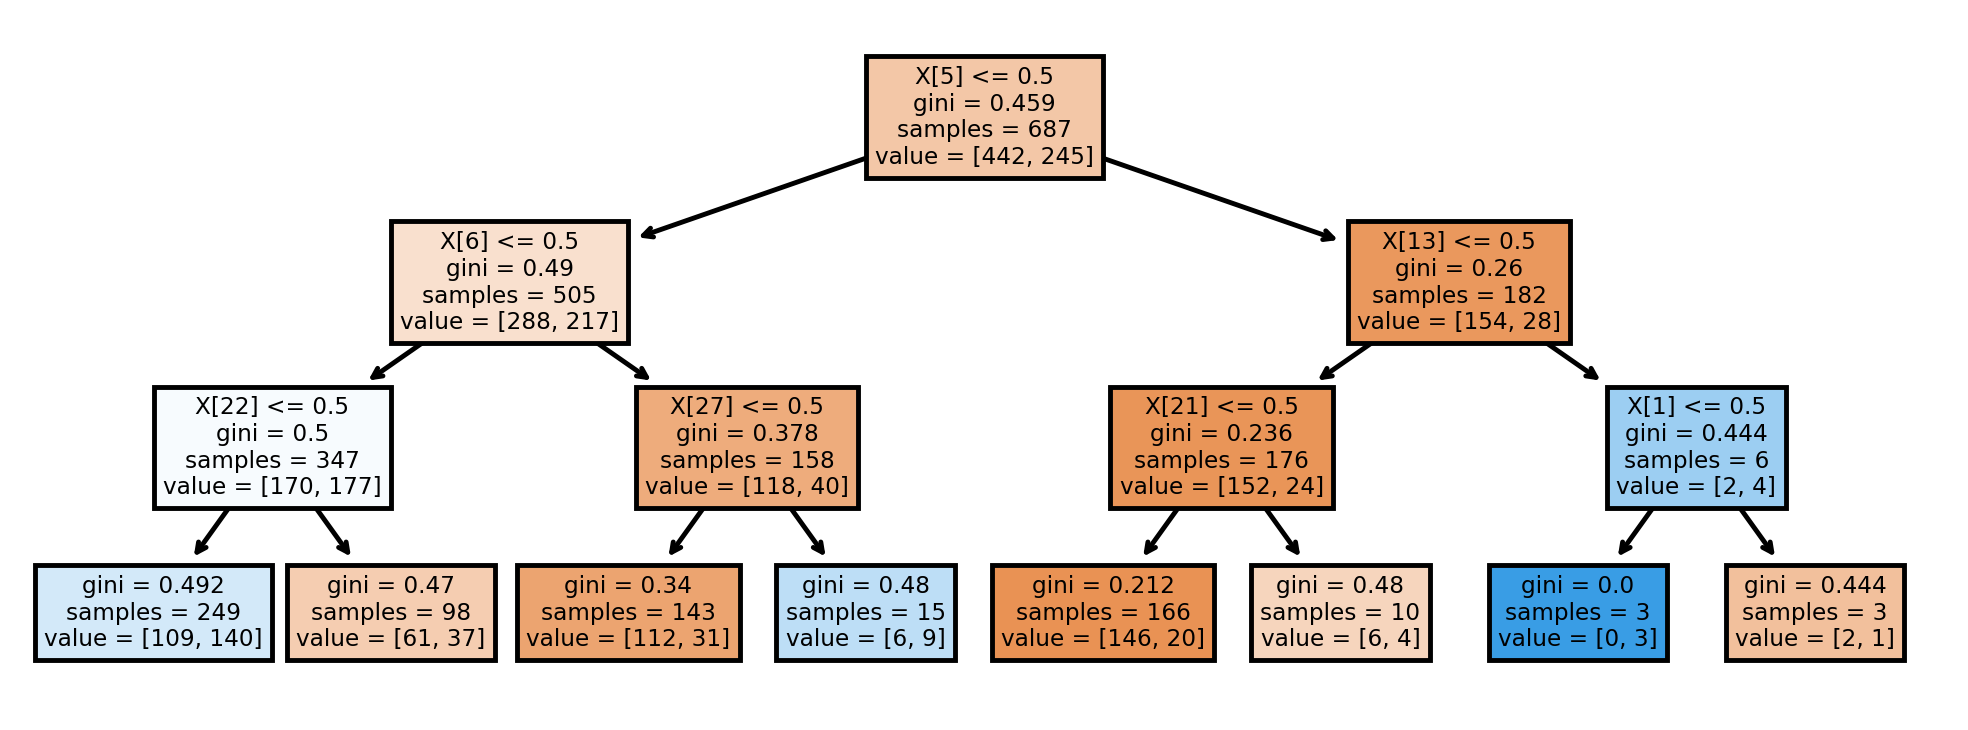

In [ ]:
fig = plt.figure(figsize=(7,2.5), dpi=350)
tree.plot_tree(clf, filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
dot_data = tree.export_graphviz(
    decision_tree=clf,
    out_file=None,
    feature_names=data.X_train.columns.values,
    class_names=data.Y_train.name,
    filled=True,
    rounded=True,
    special_characters=True)

graph=graphviz.Source(dot_data)
graph.render('tree', view=True, format='jpg')

'tree.jpg'

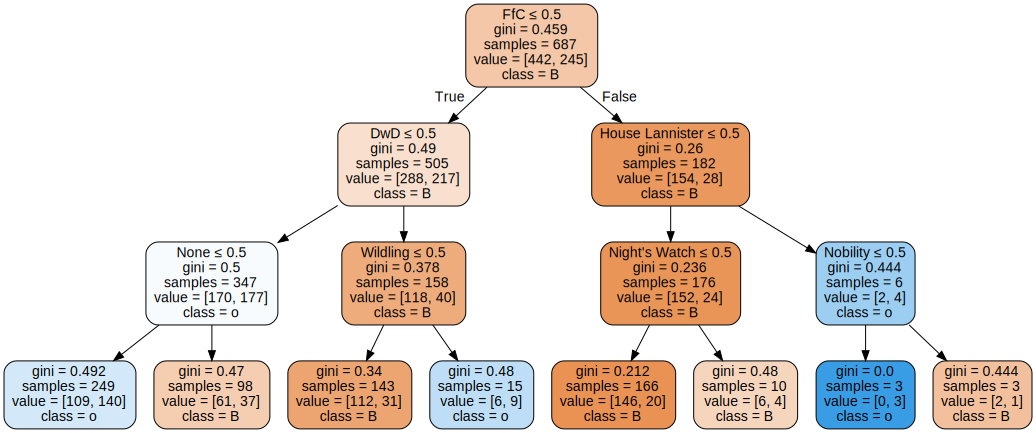

In [ ]:
graph